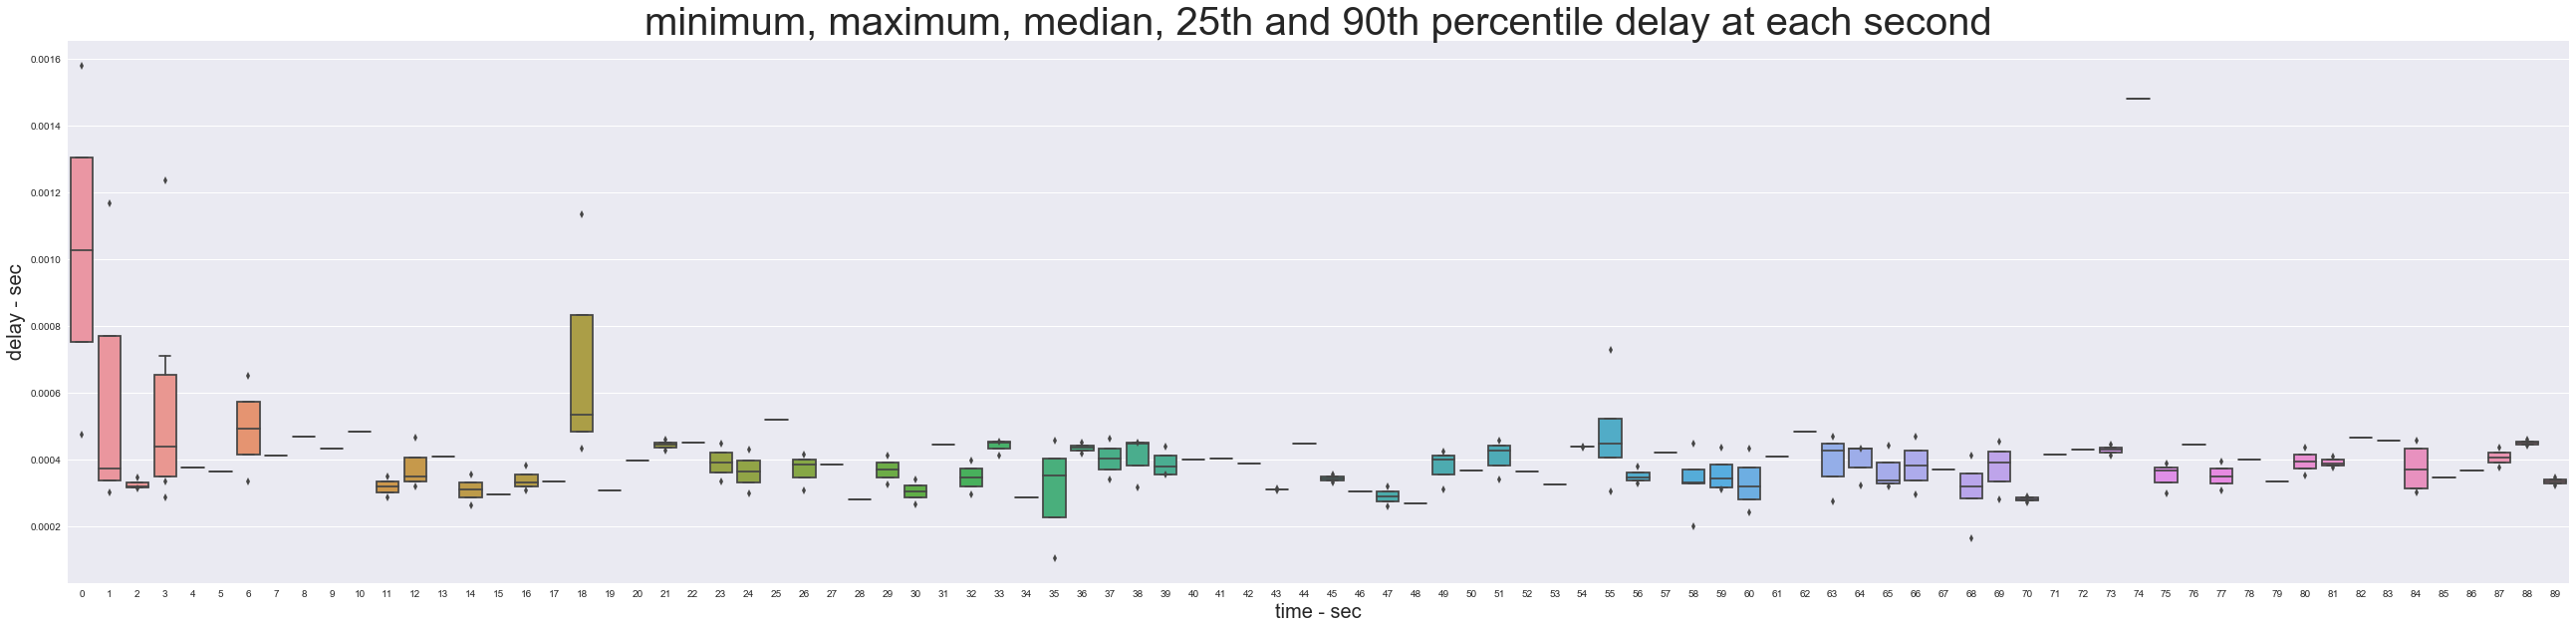

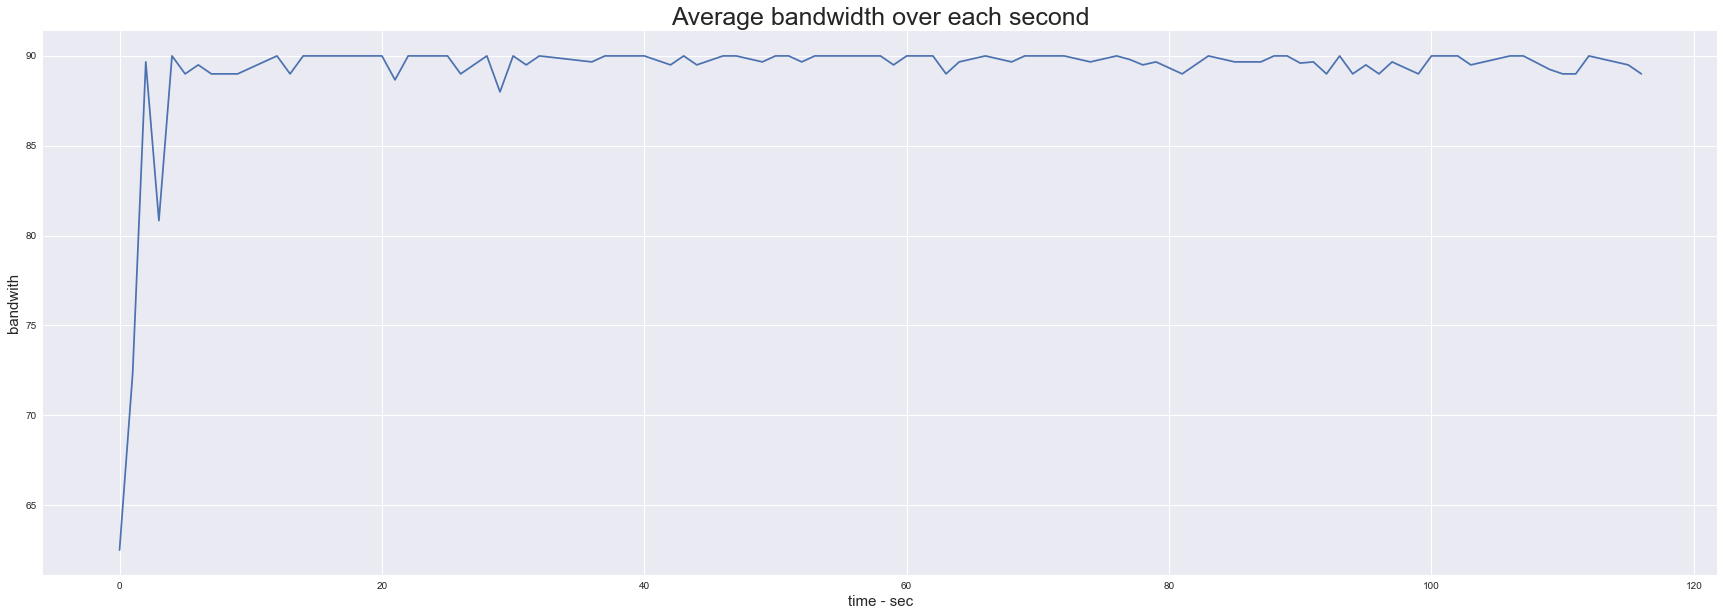

In [37]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 
import seaborn as sns

f = open("1.txt", "r")

nodeList = []
dat = {}

npDat=np.zeros((0, 3))

while True:
    logLine = f.readline()
    if logLine == "" or logLine == "\n" or logLine is None:
        break    
#     print(logLine)
    log = logLine.split(' ')
    delay = float(f.readline())
    bandwidth = int(f.readline())
#     print(log)
#     print(delay)
#     print(bandwidth)
    if(len(log) == 4): #connection
        nodeList.append(log[2])
        dat[log[2]] = {"delay": [], "bandwidth": []}
    else: #event
        dat[log[1]]['delay'].append(delay)
        dat[log[1]]['bandwidth'].append(bandwidth)
    time = float(log[0])
    npDat = np.append(npDat, [[time, delay, bandwidth]], axis = 0)

# print(npDat)
# print(npDat[:,0])
npDat[:,0] = npDat[:,0] - np.min(npDat[:,0])
# print(npDat[:,0])

n = npDat.shape[0]

data_delay = {k: [] for k in range(int(np.max(npDat[:,0]) + 1))}
data_bw = {k: [] for k in range(int(np.max(npDat[:,0]) + 1))}
data_delay_clean = {}
data_bw_clean = {}

#print(npDat)
for i in range(n): 
    t = int(npDat[i, 0])
    data_delay[t].append(npDat[i, 1])
    data_bw[t].append(npDat[i, 2])

# get rid of keys corresponding to an empty list in data_delay hash
for i in data_delay.keys():
    if(len(data_delay[i]) != 0):
        data_delay_clean[i] = data_delay[i]
        
# get rid of keys corresponding to an empty list in data_bw hash        
for i in data_bw.keys():
    if(len(data_bw[i]) != 0):
        data_bw_clean[i] = data_bw[i]

key_size = len(data_delay_clean)
boxes_bw = np.zeros((key_size, 2))

row = 0 
for i in data_bw_clean.keys():
    boxes_bw[row, 0] = i
    boxes_bw[row, 1] = mean(data_bw_clean[i])
    row += 1

data_to_plot = []   
for i in data_delay_clean.keys():
    data_to_plot.append(data_delay_clean[i])




# fig, ax = plt.subplots()
# Create the boxplot
# bp = ax.boxplot(data_to_plot)
# plt.show()




#delay
#print (data_to_plot)
f = plt.figure(1, figsize=(45,10))
f = sns.boxplot(data=data_to_plot,  whis=[25, 90])
plt.xlabel('time - sec', size = 20) 
plt.ylabel('delay - sec', size = 20) 
plt.title('minimum, maximum, median, 25th and 90th percentile delay at each second', size =40) 
plt.show()   




#bandwidth
#print(boxes_bw)
g = plt.figure(2, figsize=(30,10))
plt.plot(boxes_bw[:,0], boxes_bw[:,1])
plt.xlabel('time - sec', size = 15) 
plt.ylabel('bandwith', size = 15) 
plt.title('Average bandwidth over each second', size = 25) 
plt.show()
